# heart_disease adsgan stacking

Training on heart_disease dataset using adsgan model and stacking data

In [1]:
# Imports

from synthesizers import Load
from syntheval import SynthEval
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : 
    The default C++ compiler could not be found on your system.
    You need to either define the CXX environment variable or a symlink to the g++ command.
    For example if g++-8 is the command you can do
      import os
      os.environ['CXX'] = 'g++-8'
    
[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


Declaring real dataset and splitting into train/test

In [2]:
# Read hearts data
data_real = pd.read_csv("Data\hearts_data.csv")
data_real = data_real.dropna()
gen_method = "adsgan"
target = "target"

In [33]:
# Split hearts data into 80/20 train and test
data_train, data_test = train_test_split(data_real, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv("Data\hearts_train.csv", index=False)
data_test.to_csv("Data\hearts_test.csv", index=False)

In [3]:
data_train = Load("Data\hearts_train.csv")
data_test = Load("Data\hearts_test.csv")

# syn_v1

In [4]:
# Synthesize data
gen_count = data_real.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v1.csv", key="synth")

[2024-05-07T22:13:51.986173+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 13%|█▎        | 1299/10000 [05:34<37:19,  3.88it/s]  


[{'train': Dataset({
    features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope', 'target'],
    num_rows: 952
}), 'test': None, 'synth':       age  sex  chest pain type  resting bp s  cholesterol  \
0      39    0                2           138          195   
1      53    1                2           125          282   
2      64    1                1           149            0   
3      40    0                4           122          233   
4      39    0                4           124          213   
...   ...  ...              ...           ...          ...   
1185   56    1                4           139          193   
1186   58    1                2           147          240   
1187   40    1                4           114          279   
1188   41    0                1           109          233   
1189   54    1                4           133            4   

 

# syn_v2

In [5]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with real data
data_stack = pd.concat([data_real, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v1.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v1_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v1_test.csv", index=False)


In [6]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v2.csv", key="synth")

[2024-05-07T22:19:29.926447+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [05:42<1:22:11,  1.90it/s]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2121   47    0                2           136          210   
457    61    1                3           120            0   
1738   52    1                4           119          205   
883    44    1                2           120          263   
2279   40    0                2           121          238   
...   ...  ...              ...           ...          ...   
1638   65    1                4           162          224   
1095   55    1                2           130          262   
1130   61    1                1           134          234   
1294   59    1                4           119           19   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2121                    0            1             101                0   
457                     0            0              80                1   
1738               

# syn_v3

In [7]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v2.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v2_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v2_test.csv", index=False)


In [8]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v3.csv", key="synth")

[2024-05-07T22:25:13.181110+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  6%|▋         | 649/10000 [14:26<3:28:09,  1.34s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
624    59    1                4           110          239   
4522   57    1                4           142          259   
4227   51    0                2           130          226   
3135   44    1                3           118          244   
1554   54    1                1           118          228   
...   ...  ...              ...           ...          ...   
4426   52    0                4           137          248   
466    42    1                3           134          240   
3092   43    1                2           160          233   
3772   55    1                3           137          242   
860    62    0                4           140          268   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
624                     0            2             142                1   
4522                    0            0              89                0   
4227               

# syn_v4

In [9]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v3.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v3_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v3_test.csv", index=False)

In [10]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v4.csv", key="synth")

[2024-05-07T22:39:41.621581+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  5%|▍         | 499/10000 [31:38<10:02:36,  3.81s/it]


[{'train':       age  sex  chest pain type  resting bp s  cholesterol  \
2484   61    0                4           145          254   
3016   72    1                4           157          218   
5292   42    0                2           117           14   
7932   62    1                4           135          299   
4734   74    0                4           143          255   
...   ...  ...              ...           ...          ...   
5734   58    1                4           114          261   
5191   52    0                4           151          284   
5390   42    0                2           112          250   
860    62    0                4           140          268   
7270   58    0                4           148          386   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2484                    0            0             154                0   
3016                    0            1             128                0   
5292               

# syn_v5

In [11]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v4.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v4_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v4_test.csv", index=False)

In [12]:
# Synthesize data
gen_count = data_stack.shape[0]

Load(data_train).Train(plugin=gen_method).Generate(count=gen_count).Save(name=f"{gen_method}\hearts_syn_v5.csv", key="synth")

[2024-05-07T23:11:25.597123+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  8%|▊         | 849/10000 [2:18:18<24:50:50,  9.77s/it]


[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
2006    48    1                4           138          254   
1288    38    1                3           121          282   
18494   38    1                3           161          261   
15527   47    1                3           146          195   
12341   41    1                2           133          270   
...    ...  ...              ...           ...          ...   
11284   40    1                2           139          262   
11964   50    1                3           123            8   
5390    42    0                2           112          250   
860     62    0                4           140          268   
15795   48    1                4           147          330   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
2006                     0            0              83                1   
1288                     1            0             154                0   
1849

# stack_v5 - Final stack

In [13]:
# Read synthesized data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# Concatenate synthesized data with stack data
data_stack = pd.concat([data_stack, data_syn], ignore_index=True)

# Save to csv
data_stack.to_csv(f"{gen_method}\hearts_stack_v5.csv", index=False)

# Split synthesized data into 80/20 train and test
data_train, data_test = train_test_split(data_stack, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_v5_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_v5_test.csv", index=False)

# Train on stack_v5 and save as state

In [14]:
# Train stack_v5 and save as state
state_stack_v5 = Load(data_train).Train(plugin=gen_method)

[2024-05-08T01:29:53.932748+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  3%|▎         | 299/10000 [41:11<22:16:26,  8.27s/it]


# stack_v5 (synth only)

In [15]:
# Remove first 1190 rows, equal to the real data, from stack_v5
data_stack_synth_only = data_stack.iloc[1190:,:]

# Save to csv
data_stack_synth_only.to_csv(f"{gen_method}\hearts_stack_synth_only.csv", index=False)

# Split synth_only stack into 80/20 train and test
data_train, data_test = train_test_split(data_stack_synth_only, test_size=0.2, random_state=42)

# Save to csv
data_train.to_csv(f"{gen_method}\hearts_stack_synth_only_train.csv", index=False)
data_test.to_csv(f"{gen_method}\hearts_stack_synth_only_test.csv", index=False)

# Train on synth_only and save as state

In [16]:
# Train synth_only stack and save as state
state_stack_synth_only = Load(data_train).Train(plugin=gen_method)

[2024-05-08T02:11:12.956264+0200][10572][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  4%|▍         | 399/10000 [6:45:39<162:41:21, 61.00s/it]   


# Generate synth data based on stack_v5

In [17]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_v5.Generate(count=gen_count).Save(name=f"{gen_method}\stack_v5_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
22594   38    1                4           134          251   
1510    66    0                3           163          238   
26995   42    1                4           114          224   
14320   51    1                4           126           17   
34943   69    1                4           129          258   
...    ...  ...              ...           ...          ...   
16850   48    1                3           126          241   
6265    55    1                4           137          254   
11284   40    1                2           139          262   
860     62    0                4           140          268   
15795   48    1                4           147          330   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
22594                    0            0             160                0   
1510                     1            2             160                0   
2699

In [18]:
# Read synthesized data
stack_v5_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
stack_v5_syn = stack_v5_syn.iloc[:, 1:]

# Generate synth data based on synth_only

In [19]:
# Synthesize data
gen_count = data_real.shape[0]

state_stack_synth_only.Generate(count=gen_count).Save(name=f"{gen_method}\stack_synth_only_syn.csv", key="synth")

[{'train':        age  sex  chest pain type  resting bp s  cholesterol  \
19876   53    1                4           143          374   
6191    62    0                4           125          251   
3687    50    0                4           128          232   
1440    56    1                4           114          237   
28826   39    1                2           125          288   
...    ...  ...              ...           ...          ...   
18040   50    1                2           123          254   
7455    42    1                2           118          327   
12474   60    0                2           176          262   
2050    60    1                4           121          270   
16985   54    1                2           125          233   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
19876                    0            0             112                1   
6191                     0            1              96                0   
3687

In [20]:
# Read synthesized data
stack_synth_only_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
stack_synth_only_syn = stack_synth_only_syn.iloc[:, 1:]

# Eval on syn_1

In [4]:
# Read train and test data (this is base/real train and test data, not the stack data)
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Count of data_real
real_count = data_real.shape[0]

# Read syn_v1 data
data_syn = pd.read_csv(f"{gen_method}\hearts_syn_v1.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_real = S.evaluate(data_syn,target,"full_eval")
res_real

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.029163,0.003028,0.970837,0.003028
1,pca_eigval_diff,u,0.014961,NaN,0.985039,NaN
2,pca_eigvec_ang,u,0.078872,NaN,0.974894,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.329372,NaN,0.995010,NaN
5,mutual_inf_diff,u,0.376382,NaN,0.994297,NaN
6,ks_tvd_stat,u,0.076843,0.017461,0.923157,0.017461
7,frac_ks_sigs,u,0.500000,NaN,0.500000,NaN
8,avg_h_dist,u,0.014817,0.004810,0.985183,0.004810
9,avg_pMSE,u,0.018127,0.000500,0.927494,0.002000


# Eval on syn_2

In [5]:
# Read syn_v2 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v2.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v2_sample.csv", index=False)

In [6]:
# Read syn_v2 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v2_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v1 = S.evaluate(data_syn,target,"full_eval")
res_stack_v1

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.022675,0.003038,0.977325,0.003038
1,pca_eigval_diff,u,0.021322,NaN,0.978678,NaN
2,pca_eigvec_ang,u,0.089571,NaN,0.971489,NaN
3,avg_cio,u,0.132993,0.132993,0.132993,0.132993
4,corr_mat_diff,u,0.411929,NaN,0.993759,NaN
5,mutual_inf_diff,u,0.430419,NaN,0.993479,NaN
6,ks_tvd_stat,u,0.080595,0.016780,0.919405,0.016780
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.022377,0.006709,0.977623,0.006709
9,avg_pMSE,u,0.016735,0.000736,0.933060,0.002946


# Eval on syn_3

In [7]:
# Read syn_v3 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v3.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v3_sample.csv", index=False)

In [8]:
# Read syn_v3 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v3_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v2 = S.evaluate(data_syn,target,"full_eval")
res_stack_v2

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.040630,0.002938,0.959370,0.002938
1,pca_eigval_diff,u,0.016223,NaN,0.983777,NaN
2,pca_eigvec_ang,u,0.131669,NaN,0.958089,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.457048,NaN,0.993075,NaN
5,mutual_inf_diff,u,0.516792,NaN,0.992170,NaN
6,ks_tvd_stat,u,0.101951,0.030316,0.898049,0.030316
7,frac_ks_sigs,u,0.583333,NaN,0.416667,NaN
8,avg_h_dist,u,0.016155,0.005184,0.983845,0.005184
9,avg_pMSE,u,0.035648,0.000820,0.857406,0.003280


# Eval on syn_4

In [9]:
# Read syn_v4 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v4.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v4_sample.csv", index=False)

In [10]:
# Read syn_v4 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v4_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v3 = S.evaluate(data_syn,target,"full_eval")
res_stack_v3

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.054632,0.002916,0.945368,0.002916
1,pca_eigval_diff,u,0.034058,NaN,0.965942,NaN
2,pca_eigvec_ang,u,0.114544,NaN,0.963539,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.552474,NaN,0.991629,NaN
5,mutual_inf_diff,u,0.604265,NaN,0.990844,NaN
6,ks_tvd_stat,u,0.147332,0.031114,0.852668,0.031114
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.082174,0.056056,0.917826,0.056056
9,avg_pMSE,u,0.063153,0.001478,0.747387,0.005913


# Eval on syn_5

In [11]:
# Read syn_v5 data
syn_sample = pd.read_csv(f"{gen_method}\hearts_syn_v5.csv").round(1)

# Remove first column
syn_sample = syn_sample.iloc[:, 1:]

# Sample of size real_count
syn_sample = syn_sample.sample(real_count)

# Save to csv
syn_sample.to_csv(f"{gen_method}\syn_v5_sample.csv", index=False)

In [12]:
# Read syn_v5 sample
data_syn = pd.read_csv(f"{gen_method}\syn_v5_sample.csv")

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v4 = S.evaluate(data_syn,target,"full_eval")
res_stack_v4

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.049496,0.002910,0.950504,0.002910
1,pca_eigval_diff,u,0.059625,NaN,0.940375,NaN
2,pca_eigvec_ang,u,0.321299,NaN,0.897727,NaN
3,avg_cio,u,0.000000,0.000000,0.000000,0.000000
4,corr_mat_diff,u,0.747641,NaN,0.988672,NaN
5,mutual_inf_diff,u,0.600089,NaN,0.990908,NaN
6,ks_tvd_stat,u,0.138748,0.036762,0.861252,0.036762
7,frac_ks_sigs,u,0.750000,NaN,0.250000,NaN
8,avg_h_dist,u,0.020243,0.006848,0.979757,0.006848
9,avg_pMSE,u,0.047631,0.001727,0.809477,0.006909


# Eval on stack_v5 to real data

In [13]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_v5_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_v5_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_v5 = S.evaluate(data_syn,target,"full_eval")
res_stack_v5

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.048460,0.002935,0.951540,0.002935
1,pca_eigval_diff,u,0.047871,NaN,0.952129,NaN
2,pca_eigvec_ang,u,0.096499,NaN,0.969283,NaN
3,avg_cio,u,0.209486,0.166807,0.209486,0.166807
4,corr_mat_diff,u,0.590880,NaN,0.991047,NaN
5,mutual_inf_diff,u,0.693182,NaN,0.989497,NaN
6,ks_tvd_stat,u,0.146577,0.039298,0.853423,0.039298
7,frac_ks_sigs,u,0.666667,NaN,0.333333,NaN
8,avg_h_dist,u,0.024922,0.009673,0.975078,0.009673
9,avg_pMSE,u,0.044838,0.000882,0.820649,0.003527


# Eval on stack_synth_only to real data

In [14]:
# Read train and test data from real data
data_train = pd.read_csv("Data\hearts_train.csv")
data_test = pd.read_csv("Data\hearts_test.csv")

# Read stack_synth_only_syn data
data_syn = pd.read_csv(f"{gen_method}\stack_synth_only_syn.csv").round(1)

# Remove first column
data_syn = data_syn.iloc[:, 1:]

# SynthEval
S = SynthEval(data_train, holdout_dataframe=data_test, verbose=0)
res_stack_synth_only = S.evaluate(data_syn,target,"full_eval")
res_stack_synth_only

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.056961,0.002925,0.943039,0.002925
1,pca_eigval_diff,u,0.058977,NaN,0.941023,NaN
2,pca_eigvec_ang,u,0.181648,NaN,0.942180,NaN
3,avg_cio,u,0.153298,0.153298,0.153298,0.153298
4,corr_mat_diff,u,0.669011,NaN,0.989863,NaN
5,mutual_inf_diff,u,0.682954,NaN,0.989652,NaN
6,ks_tvd_stat,u,0.130988,0.027481,0.869012,0.027481
7,frac_ks_sigs,u,0.833333,NaN,0.166667,NaN
8,avg_h_dist,u,0.029019,0.009385,0.970981,0.009385
9,avg_pMSE,u,0.070188,0.001090,0.719249,0.004359


# Multiple plots for evaluation comparisons

In [15]:
import matplotlib.pyplot as plt

# Evaluating synth stacks over time

In [16]:
eval_results = [res_real, res_stack_v1, res_stack_v2, res_stack_v3, res_stack_v4, res_stack_v5, res_stack_synth_only]
eval_str = ["res_real", "res_stack_v1", "res_stack_v2", "res_stack_v3", "res_stack_v4", "res_stack_v5", "res_stack_synth_only"]

In [17]:
privacy_plot = pd.DataFrame(columns=["eps_identif_risk",
                                     "att_discl_risk",
                                     "mia_cls_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    privacy_plot.loc[eval_str[i]] = [evals.loc["eps_identif_risk", "val"], 
                                    evals.loc["att_discl_risk", "val"],
                                    evals.loc["mia_cls_risk", "val"]]

# Save to csv
privacy_plot.to_csv(f"{gen_method}\privacy_plot.csv")

privacy_plot

,eps_identif_risk,att_discl_risk,mia_cls_risk
res_real,0.088235,0.456443,0.991597
res_stack_v1,0.078782,0.462675,0.936134
res_stack_v2,0.096639,0.480742,0.870588
res_stack_v3,0.057773,0.444328,0.863866
res_stack_v4,0.037815,0.441527,0.559664
res_stack_v5,0.066176,0.442857,0.453782
res_stack_synth_only,0.047269,0.432073,0.418487


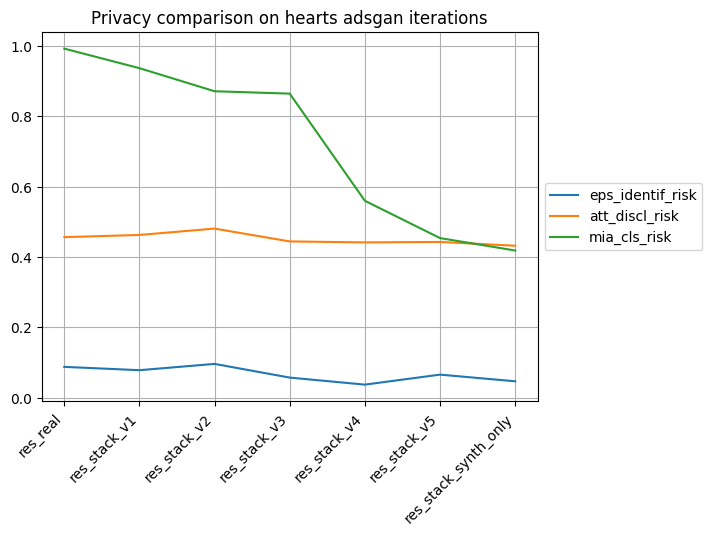

In [18]:
privacy_plot.plot.line()
plt.title("Privacy comparison on hearts adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [19]:
DCR_plot = pd.DataFrame(columns=["median_DCR"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    DCR_plot.loc[eval_str[i]] = [evals.loc["median_DCR", "val"]]

# Save to csv
DCR_plot.to_csv(f"{gen_method}\DCR_plot.csv")

DCR_plot

,median_DCR
res_real,3.335017
res_stack_v1,3.969487
res_stack_v2,3.518051
res_stack_v3,4.208126
res_stack_v4,4.513085
res_stack_v5,4.363951
res_stack_synth_only,4.836810


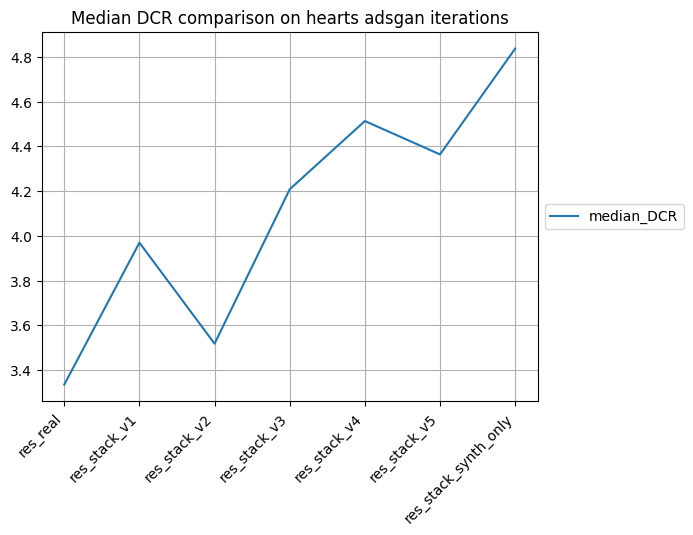

In [20]:
DCR_plot.plot.line()
plt.title("Median DCR comparison on hearts adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [21]:
utility_plot = pd.DataFrame(columns=["avg_dwm_diff",
                                     "avg_pMSE",
                                     "cls_F1_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    utility_plot.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"], 
                                    evals.loc["avg_pMSE", "val"],
                                    evals.loc["cls_F1_diff", "val"]]


utility_plot

,avg_dwm_diff,avg_pMSE,cls_F1_diff
res_real,0.029163,0.018127,0.055929
res_stack_v1,0.022675,0.016735,0.084577
res_stack_v2,0.040630,0.035648,0.081193
res_stack_v3,0.054632,0.063153,0.089832
res_stack_v4,0.049496,0.047631,0.117374
res_stack_v5,0.048460,0.044838,0.086160
res_stack_synth_only,0.056961,0.070188,0.115521


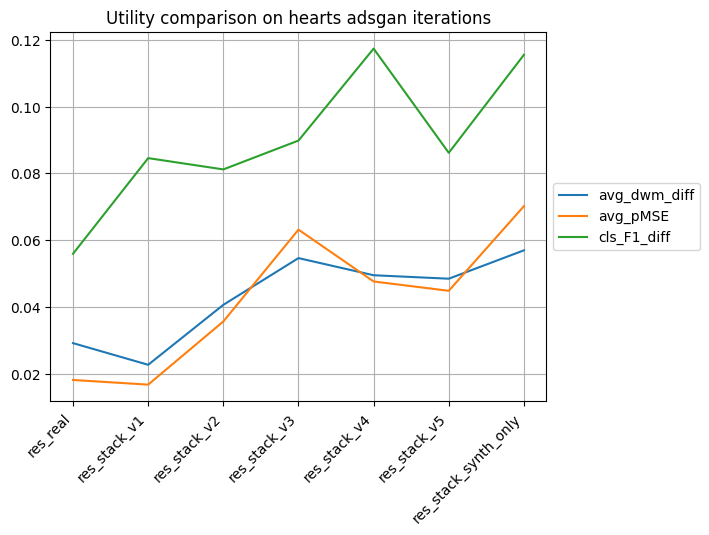

In [22]:
utility_plot.plot.line()
plt.title("Utility comparison on hearts adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [23]:
matrix_diff_plot = pd.DataFrame(columns=["corr_mat_diff"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    matrix_diff_plot.loc[eval_str[i]] = [evals.loc["corr_mat_diff", "val"]]

# Save to csv
matrix_diff_plot.to_csv(f"{gen_method}\matrix_diff_plot.csv", index=False)

matrix_diff_plot

,corr_mat_diff
res_real,0.329372
res_stack_v1,0.411929
res_stack_v2,0.457048
res_stack_v3,0.552474
res_stack_v4,0.747641
res_stack_v5,0.590880
res_stack_synth_only,0.669011


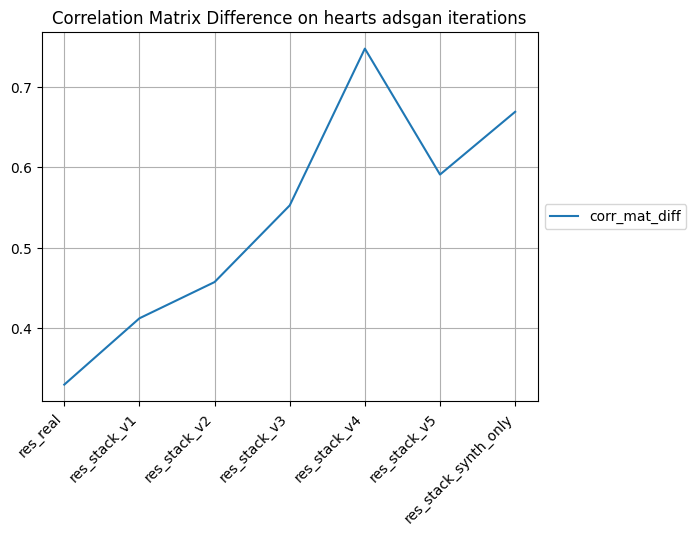

In [24]:
matrix_diff_plot.plot.line()
plt.title("Correlation Matrix Difference on hearts adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [25]:
total_eval = pd.DataFrame(columns=["avg_dwm_diff",
                                   "pca_eigval_diff",
                                  "pca_eigvec_ang",
                                  "avg_cio",
                                  "corr_mat_diff",
                                  "mutual_inf_diff",
                                  "ks_tvd_stat",
                                  "frac_ks_sigs",
                                  "avg_h_dist",
                                  "avg_pMSE",
                                  "avg_nndr",
                                  "priv_loss_nndr",
                                  "nnaa",
                                  "priv_loss_nnaa",
                                  "cls_F1_diff",
                                  "cls_F1_diff_hout",
                                  "auroc",
                                  "hit_rate",
                                  "eps_identif_risk",
                                  "mia_cls_risk",
                                  "att_discl_risk"])

for i in range(len(eval_results)):
    evals = eval_results[i].set_index("metric")
    total_eval.loc[eval_str[i]] = [evals.loc["avg_dwm_diff", "val"],
                                   evals.loc["pca_eigval_diff", "val"],
                                   evals.loc["pca_eigvec_ang", "val"],
                                   evals.loc["avg_cio", "val"],
                                   evals.loc["corr_mat_diff", "val"],
                                   evals.loc["mutual_inf_diff", "val"],
                                   evals.loc["ks_tvd_stat", "val"],
                                   evals.loc["frac_ks_sigs", "val"],
                                   evals.loc["avg_h_dist", "val"],
                                   evals.loc["avg_pMSE", "val"],
                                   evals.loc["avg_nndr", "val"],
                                   evals.loc["priv_loss_nndr", "val"],
                                   evals.loc["nnaa", "val"],
                                   evals.loc["priv_loss_nnaa", "val"],
                                   evals.loc["cls_F1_diff", "val"],
                                   evals.loc["cls_F1_diff_hout", "val"],
                                   evals.loc["auroc", "val"],
                                   evals.loc["hit_rate", "val"],
                                   evals.loc["eps_identif_risk", "val"],
                                   evals.loc["mia_cls_risk", "val"],
                                   evals.loc["att_discl_risk", "val"]]
total_eval

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang,avg_cio,corr_mat_diff,mutual_inf_diff,ks_tvd_stat,frac_ks_sigs,avg_h_dist,avg_pMSE,...,priv_loss_nndr,nnaa,priv_loss_nnaa,cls_F1_diff,cls_F1_diff_hout,auroc,hit_rate,eps_identif_risk,mia_cls_risk,att_discl_risk
res_real,0.029163,0.014961,0.078872,0.000000,0.329372,0.376382,0.076843,0.500000,0.014817,0.018127,...,-0.022779,0.843592,-0.148284,0.055929,0.035714,0.011887,0.002101,0.088235,0.991597,0.456443
res_stack_v1,0.022675,0.021322,0.089571,0.132993,0.411929,0.430419,0.080595,0.833333,0.022377,0.016735,...,0.007182,0.841597,-0.187255,0.084577,0.046218,0.006543,0.000000,0.078782,0.936134,0.462675
res_stack_v2,0.040630,0.016223,0.131669,0.000000,0.457048,0.516792,0.101951,0.583333,0.016155,0.035648,...,0.020590,0.826261,-0.214286,0.081193,0.032563,0.003708,0.000000,0.096639,0.870588,0.480742
res_stack_v3,0.054632,0.034058,0.114544,0.000000,0.552474,0.604265,0.147332,0.666667,0.082174,0.063153,...,-0.011682,0.878046,-0.181408,0.089832,0.038866,0.001472,0.000000,0.057773,0.863866,0.444328
res_stack_v4,0.049496,0.059625,0.321299,0.000000,0.747641,0.600089,0.138748,0.750000,0.020243,0.047631,...,-0.002428,0.877941,-0.186275,0.117374,0.051471,0.006870,0.000000,0.037815,0.559664,0.441527
res_stack_v5,0.048460,0.047871,0.096499,0.209486,0.590880,0.693182,0.146577,0.666667,0.024922,0.044838,...,-0.004801,0.852941,-0.122619,0.086160,0.042017,0.002508,0.000000,0.066176,0.453782,0.442857
res_stack_synth_only,0.056961,0.058977,0.181648,0.153298,0.669011,0.682954,0.130988,0.833333,0.029019,0.070188,...,0.002954,0.890756,-0.153151,0.115521,0.072479,0.000545,0.000000,0.047269,0.418487,0.432073


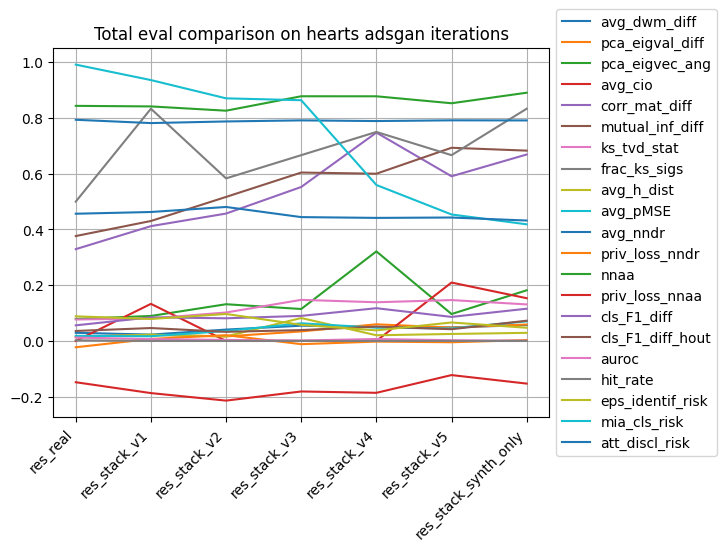

In [26]:
total_eval.plot.line()
plt.title("Total eval comparison on hearts adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()

In [27]:
overall_res = pd.DataFrame({"Stacks": eval_str})

pr_res, ut_res = [], []

for i in range(len(eval_results)):
    pr_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(eval_results[i][eval_results[i]['dim'] == 'u']['n_val']))

overall_res["Utility"] = ut_res
overall_res["Privacy"] = pr_res

# Save to csv
overall_res.to_csv(f"{gen_method}\overall_res.csv", index=False)

overall_res

,Stacks,Utility,Privacy
0,res_real,0.807771,0.760213
1,res_stack_v1,0.790396,0.763633
2,res_stack_v2,0.792766,0.762882
3,res_stack_v3,0.764309,0.779002
4,res_stack_v4,0.758215,0.820142
5,res_stack_v5,0.790131,0.837641
6,res_stack_synth_only,0.757547,0.842153


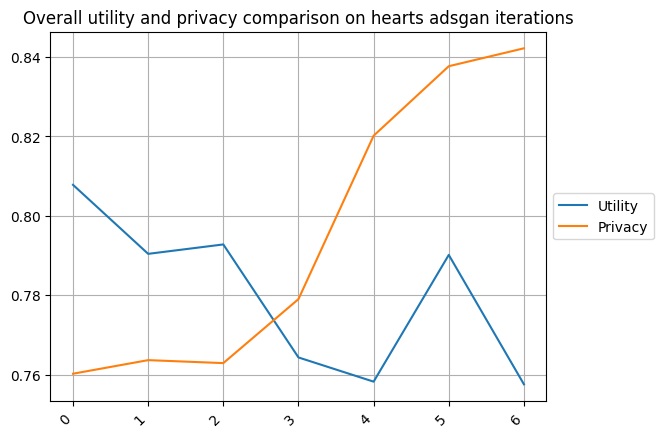

In [28]:
overall_res.plot.line()
plt.title("Overall utility and privacy comparison on hearts adsgan iterations")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.show()